In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cve-common-vulnerabilities-and-exposures/products.csv
/kaggle/input/cve-common-vulnerabilities-and-exposures/vendors.csv
/kaggle/input/cve-common-vulnerabilities-and-exposures/cve.csv
/kaggle/input/cve-common-vulnerabilities-and-exposures/vendor_product.csv


In [3]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/cve-common-vulnerabilities-and-exposures/cve.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Display all column names
print(df.columns)

       Unnamed: 0             mod_date             pub_date  cvss  cwe_code  \
0  CVE-2019-16548  2019-11-21 15:15:00  2019-11-21 15:15:00   6.8       352   
1  CVE-2019-16547  2019-11-21 15:15:00  2019-11-21 15:15:00   4.0       732   
2  CVE-2019-16546  2019-11-21 15:15:00  2019-11-21 15:15:00   4.3       639   
3   CVE-2013-2092  2019-11-20 21:22:00  2019-11-20 21:15:00   4.3        79   
4   CVE-2013-2091  2019-11-20 20:15:00  2019-11-20 20:15:00   7.5        89   

                                            cwe_name  \
0                  Cross-Site Request Forgery (CSRF)   
1   Incorrect Permission Assignment for Critical ...   
2   Authorization Bypass Through User-Controlled Key   
3   Improper Neutralization of Input During Web P...   
4   Improper Neutralization of Special Elements u...   

                                             summary access_authentication  \
0  A cross-site request forgery vulnerability in ...                   NaN   
1  Missing permission checks in 

In [4]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/cve-common-vulnerabilities-and-exposures/cve.csv'
df = pd.read_csv(file_path)

# Display the first 5 rows and column names
print("First 5 rows of the dataset:")
print(df.head())
print("\nColumn names in the dataset:")
print(df.columns.tolist())  # List all column names

First 5 rows of the dataset:
       Unnamed: 0             mod_date             pub_date  cvss  cwe_code  \
0  CVE-2019-16548  2019-11-21 15:15:00  2019-11-21 15:15:00   6.8       352   
1  CVE-2019-16547  2019-11-21 15:15:00  2019-11-21 15:15:00   4.0       732   
2  CVE-2019-16546  2019-11-21 15:15:00  2019-11-21 15:15:00   4.3       639   
3   CVE-2013-2092  2019-11-20 21:22:00  2019-11-20 21:15:00   4.3        79   
4   CVE-2013-2091  2019-11-20 20:15:00  2019-11-20 20:15:00   7.5        89   

                                            cwe_name  \
0                  Cross-Site Request Forgery (CSRF)   
1   Incorrect Permission Assignment for Critical ...   
2   Authorization Bypass Through User-Controlled Key   
3   Improper Neutralization of Input During Web P...   
4   Improper Neutralization of Special Elements u...   

                                             summary access_authentication  \
0  A cross-site request forgery vulnerability in ...                   NaN   
1  

In [5]:
# Count missing values
print(df.isnull().sum())

# Drop rows with too many missing values
df = df.dropna()


Unnamed: 0                  0
mod_date                    0
pub_date                    0
cvss                        0
cwe_code                    0
cwe_name                    0
summary                     0
access_authentication     884
access_complexity         884
access_vector             884
impact_availability       884
impact_confidentiality    884
impact_integrity          884
dtype: int64


In [6]:
# Fill missing categorical values with 'Unknown'
missing_cols = ['access_authentication', 'access_complexity', 'access_vector',
                'impact_availability', 'impact_confidentiality', 'impact_integrity']

for col in missing_cols:
    df[col].fillna('Unknown', inplace=True)

# Verify if missing values are handled
print(df.isnull().sum())  # Should show all zeros now

Unnamed: 0                0
mod_date                  0
pub_date                  0
cvss                      0
cwe_code                  0
cwe_name                  0
summary                   0
access_authentication     0
access_complexity         0
access_vector             0
impact_availability       0
impact_confidentiality    0
impact_integrity          0
dtype: int64


<ipython-input-6-4ef7500fccb5>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)


In [7]:
df.loc[:, 'access_authentication'] = df['access_authentication'].fillna("Unknown")
df.loc[:, 'access_complexity'] = df['access_complexity'].fillna("Unknown")
df.loc[:, 'access_vector'] = df['access_vector'].fillna("Unknown")
df.loc[:, 'impact_availability'] = df['impact_availability'].fillna("No Impact")
df.loc[:, 'impact_confidentiality'] = df['impact_confidentiality'].fillna("No Impact")
df.loc[:, 'impact_integrity'] = df['impact_integrity'].fillna("No Impact")

In [9]:
df = df.assign(
    access_authentication=df['access_authentication'].fillna("Unknown"),
    access_complexity=df['access_complexity'].fillna("Unknown"),
    access_vector=df['access_vector'].fillna("Unknown"),
    impact_availability=df['impact_availability'].fillna("No Impact"),
    impact_confidentiality=df['impact_confidentiality'].fillna("No Impact"),
    impact_integrity=df['impact_integrity'].fillna("No Impact")
)


In [10]:
print(df.isnull().sum())

Unnamed: 0                0
mod_date                  0
pub_date                  0
cvss                      0
cwe_code                  0
cwe_name                  0
summary                   0
access_authentication     0
access_complexity         0
access_vector             0
impact_availability       0
impact_confidentiality    0
impact_integrity          0
dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


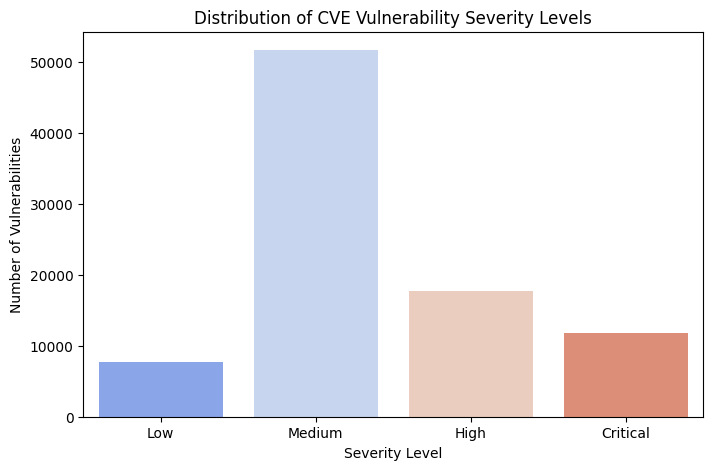

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Classify vulnerabilities based on CVSS Score
df['cvss_severity'] = pd.cut(df['cvss'], bins=[0, 3.9, 6.9, 8.9, 10],
                             labels=['Low', 'Medium', 'High', 'Critical'])

# Count vulnerabilities by severity level
severity_counts = df['cvss_severity'].value_counts()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=severity_counts.index, y=severity_counts.values, palette="coolwarm")
plt.xlabel("Severity Level")
plt.ylabel("Number of Vulnerabilities")
plt.title("Distribution of CVE Vulnerability Severity Levels")
plt.show()


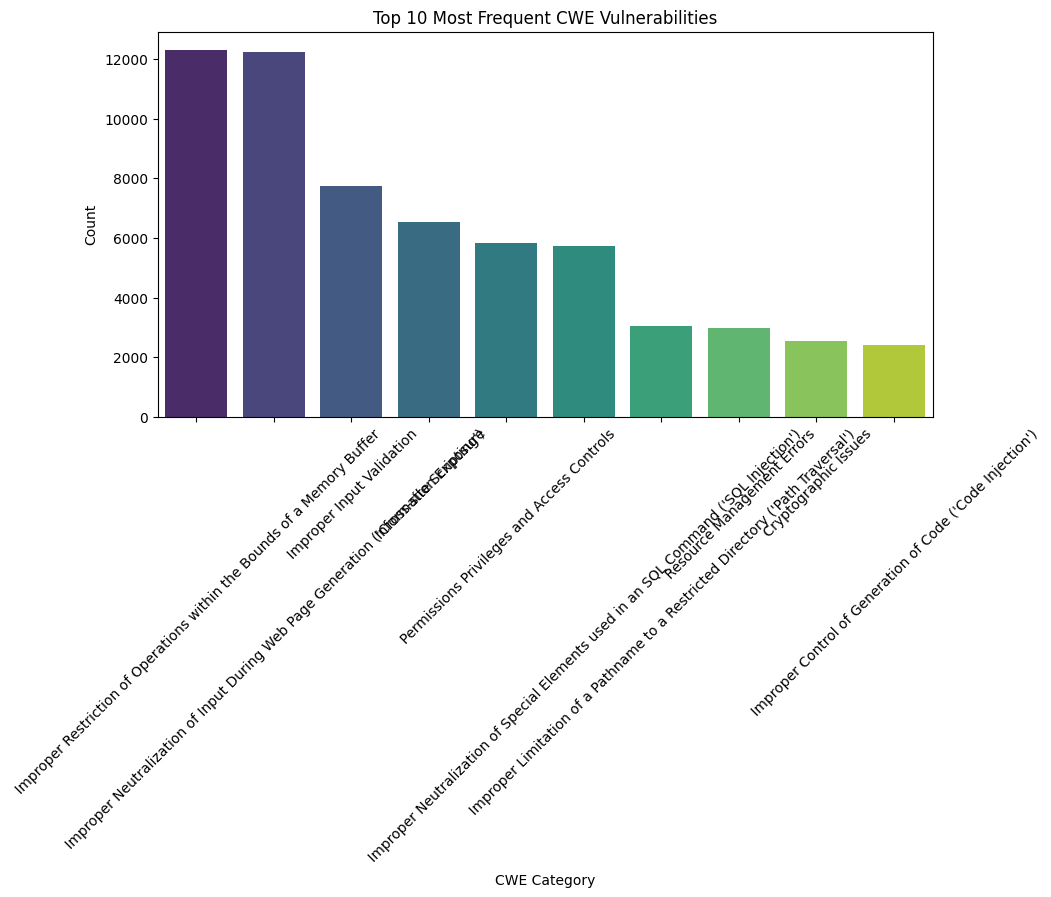

In [12]:
# Find the most frequent CWE categories
top_cwe = df['cwe_name'].value_counts().head(10)

# Plot CWE categories
plt.figure(figsize=(10,5))
sns.barplot(x=top_cwe.index, y=top_cwe.values, palette="viridis")
plt.xlabel("CWE Category")
plt.ylabel("Count")
plt.title("Top 10 Most Frequent CWE Vulnerabilities")
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


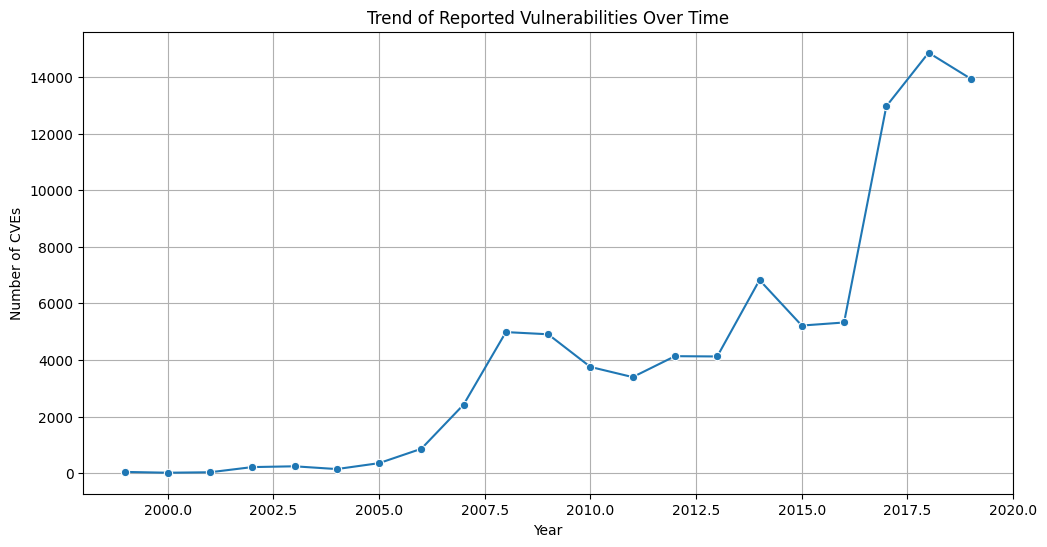

In [13]:
# Convert the 'pub_date' column to datetime format
df['pub_date'] = pd.to_datetime(df['pub_date'])

# Extract year from publication date
df['year'] = df['pub_date'].dt.year

# Count CVEs per year
cve_trend = df.groupby('year').size()

# Plot the trend
plt.figure(figsize=(12,6))
sns.lineplot(x=cve_trend.index, y=cve_trend.values, marker="o")
plt.xlabel("Year")
plt.ylabel("Number of CVEs")
plt.title("Trend of Reported Vulnerabilities Over Time")
plt.grid()
plt.show()


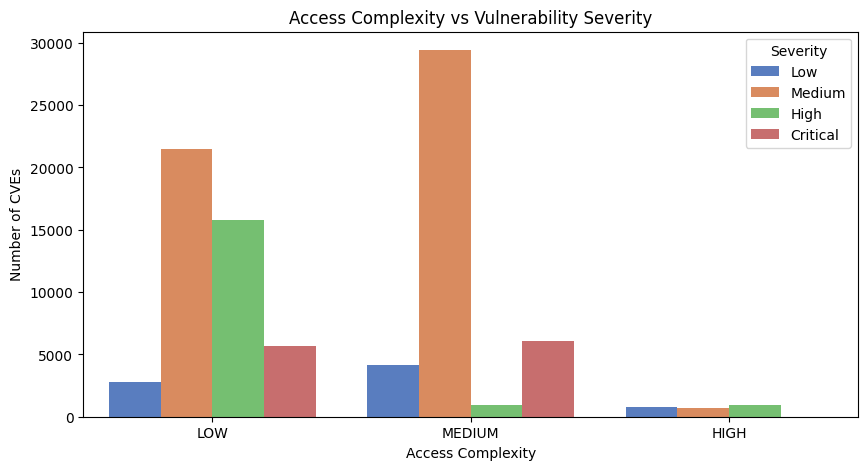

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x="access_complexity", hue="cvss_severity", data=df, palette="muted")
plt.xlabel("Access Complexity")
plt.ylabel("Number of CVEs")
plt.title("Access Complexity vs Vulnerability Severity")
plt.legend(title="Severity", loc="upper right")
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Convert categorical features to numerical
df['access_authentication'] = df['access_authentication'].astype('category').cat.codes
df['access_complexity'] = df['access_complexity'].astype('category').cat.codes
df['access_vector'] = df['access_vector'].astype('category').cat.codes

# Prepare dataset
X = df[['access_authentication', 'access_complexity', 'access_vector']]
y = df['cvss_severity'].astype('category').cat.codes  # Convert labels

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.617650371705339
              precision    recall  f1-score   support

           0       0.76      0.43      0.55      1496
           1       0.79      0.68      0.73     10344
           2       0.41      0.93      0.57      3515
           3       0.00      0.00      0.00      2401

    accuracy                           0.62     17756
   macro avg       0.49      0.51      0.46     17756
weighted avg       0.60      0.62      0.58     17756



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
import pandas as pd

# Reload your dataset
df = pd.read_csv("/kaggle/input/cve-common-vulnerabilities-and-exposures/cve.csv")  

# Display first few rows to confirm
df.head()


,Unnamed: 0,mod_date,pub_date,cvss,cwe_code,cwe_name,summary,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity
0,CVE-2019-16548,2019-11-21 15:15:00,2019-11-21 15:15:00,6.8,352,Cross-Site Request Forgery (CSRF),A cross-site request forgery vulnerability in ...,NaN,NaN,NaN,NaN,NaN,NaN
1,CVE-2019-16547,2019-11-21 15:15:00,2019-11-21 15:15:00,4.0,732,Incorrect Permission Assignment for Critical ...,Missing permission checks in various API endpo...,NaN,NaN,NaN,NaN,NaN,NaN
2,CVE-2019-16546,2019-11-21 15:15:00,2019-11-21 15:15:00,4.3,639,Authorization Bypass Through User-Controlled Key,Jenkins Google Compute Engine Plugin 4.1.1 and...,NaN,NaN,NaN,NaN,NaN,NaN
3,CVE-2013-2092,2019-11-20 21:22:00,2019-11-20 21:15:00,4.3,79,Improper Neutralization of Input During Web P...,Cross-site Scripting (XSS) in Dolibarr ERP/CRM...,NaN,NaN,NaN,NaN,NaN,NaN
4,CVE-2013-2091,2019-11-20 20:15:00,2019-11-20 20:15:00,7.5,89,Improper Neutralization of Special Elements u...,SQL injection vulnerability in Dolibarr ERP/CR...,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
print(df.columns)  # Show available column names


Index(['Unnamed: 0', 'mod_date', 'pub_date', 'cvss', 'cwe_code', 'cwe_name',
       'summary', 'access_authentication', 'access_complexity',
       'access_vector', 'impact_availability', 'impact_confidentiality',
       'impact_integrity'],
      dtype='object')


In [18]:
X = df.drop(columns=['cvss'])  # Use correct column name
y = df['cvss']  # Target column


In [19]:
print(df.dtypes)  # Check data types


Unnamed: 0                 object
mod_date                   object
pub_date                   object
cvss                      float64
cwe_code                    int64
cwe_name                   object
summary                    object
access_authentication      object
access_complexity          object
access_vector              object
impact_availability        object
impact_confidentiality     object
impact_integrity           object
dtype: object


In [20]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['cwe_name', 'access_authentication', 'access_complexity', 'access_vector']

label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


In [21]:
print(df.columns)  # List all column names


Index(['Unnamed: 0', 'mod_date', 'pub_date', 'cvss', 'cwe_code', 'cwe_name',
       'summary', 'access_authentication', 'access_complexity',
       'access_vector', 'impact_availability', 'impact_confidentiality',
       'impact_integrity'],
      dtype='object')


In [22]:
print(df.dtypes)


Unnamed: 0                 object
mod_date                   object
pub_date                   object
cvss                      float64
cwe_code                    int64
cwe_name                    int64
summary                    object
access_authentication       int64
access_complexity           int64
access_vector               int64
impact_availability        object
impact_confidentiality     object
impact_integrity           object
dtype: object


In [23]:
categorical_columns = ['cwe_name', 'access_authentication', 'access_complexity', 'access_vector']
existing_categorical = [col for col in categorical_columns if col in df.columns]  # Keep only existing columns

if existing_categorical:  # Only encode if columns exist
    df = pd.get_dummies(df, columns=existing_categorical)
else:
    print("No categorical columns found for one-hot encoding.")


In [35]:
import pandas as pd

df = pd.read_csv("/kaggle/input/cve-common-vulnerabilities-and-exposures/cve.csv")
print(df.columns)  # Verify column names


Index(['Unnamed: 0', 'mod_date', 'pub_date', 'cvss', 'cwe_code', 'cwe_name',
       'summary', 'access_authentication', 'access_complexity',
       'access_vector', 'impact_availability', 'impact_confidentiality',
       'impact_integrity'],
      dtype='object')


In [36]:
print(df.columns)  # See all available columns
print(df.dtypes)   # Check the data types


Index(['Unnamed: 0', 'mod_date', 'pub_date', 'cvss', 'cwe_code', 'cwe_name',
       'summary', 'access_authentication', 'access_complexity',
       'access_vector', 'impact_availability', 'impact_confidentiality',
       'impact_integrity'],
      dtype='object')
Unnamed: 0                 object
mod_date                   object
pub_date                   object
cvss                      float64
cwe_code                    int64
cwe_name                   object
summary                    object
access_authentication      object
access_complexity          object
access_vector              object
impact_availability        object
impact_confidentiality     object
impact_integrity           object
dtype: object


In [37]:
categorical_columns = ['cwe_name', 'access_authentication', 'access_complexity', 'access_vector']

for col in categorical_columns:
    if col in df.columns:
        print(f"{col} exists and has {df[col].nunique()} unique values.")
    else:
        print(f"⚠️ {col} NOT FOUND in the dataset.")


cwe_name exists and has 170 unique values.
access_authentication exists and has 3 unique values.
access_complexity exists and has 3 unique values.
access_vector exists and has 3 unique values.


In [38]:
# Keep only categorical columns that exist in the dataset
existing_categorical = [col for col in categorical_columns if col in df.columns]

if existing_categorical:  
    df = pd.get_dummies(df, columns=existing_categorical)
    print("One-hot encoding applied successfully!")
else:
    print("⚠️ No categorical columns found for one-hot encoding.")


One-hot encoding applied successfully!


In [39]:
print(df.isnull().sum())  # Check missing values

# Fill missing values with appropriate values
df.fillna({'cvss': df['cvss'].mean(),  # Fill missing CVSS with mean value
           'impact_availability': "No Impact",
           'impact_confidentiality': "No Impact",
           'impact_integrity': "No Impact"}, inplace=True)


Unnamed: 0                        0
mod_date                          0
pub_date                          0
cvss                              0
cwe_code                          0
                                 ..
access_complexity_LOW             0
access_complexity_MEDIUM          0
access_vector_ADJACENT_NETWORK    0
access_vector_LOCAL               0
access_vector_NETWORK             0
Length: 188, dtype: int64


In [40]:
X = df.drop(columns=['cvss'])  # Drop target column
y = df['cvss']  # Target variable


In [41]:
import numpy as np

# Convert CVSS scores into categories
df['cvss_severity'] = pd.cut(df['cvss'], bins=[0, 3.9, 6.9, 8.9, 10],
                             labels=[0, 1, 2, 3])  # 0=Low, 1=Medium, 2=High, 3=Critical

# Drop original CVSS column
df.drop(columns=['cvss'], inplace=True)

# Define features and target
X = df.drop(columns=['cvss_severity'])  # Features
y = df['cvss_severity']  # Target (now categorical)

print(y.value_counts())  # Check distribution


cvss_severity
1    52149
2    17888
3    11794
0     7828
Name: count, dtype: int64


In [42]:
print(df.columns)  # List all column names
print(df.dtypes)   # Check data types


Index(['Unnamed: 0', 'mod_date', 'pub_date', 'cwe_code', 'summary',
       'impact_availability', 'impact_confidentiality', 'impact_integrity',
       'cwe_name_ 7PK - Code Quality', 'cwe_name_ 7PK - Errors',
       ...
       'access_authentication_MULTIPLE', 'access_authentication_NONE',
       'access_authentication_SINGLE', 'access_complexity_HIGH',
       'access_complexity_LOW', 'access_complexity_MEDIUM',
       'access_vector_ADJACENT_NETWORK', 'access_vector_LOCAL',
       'access_vector_NETWORK', 'cvss_severity'],
      dtype='object', length=188)
Unnamed: 0                          object
mod_date                            object
pub_date                            object
cwe_code                             int64
summary                             object
                                    ...   
access_complexity_MEDIUM              bool
access_vector_ADJACENT_NETWORK        bool
access_vector_LOCAL                   bool
access_vector_NETWORK                 bool
cvss_s

In [43]:
import pandas as pd

df = pd.read_csv("/kaggle/input/cve-common-vulnerabilities-and-exposures/cve.csv")
print(df.columns)  # Confirm column names


Index(['Unnamed: 0', 'mod_date', 'pub_date', 'cvss', 'cwe_code', 'cwe_name',
       'summary', 'access_authentication', 'access_complexity',
       'access_vector', 'impact_availability', 'impact_confidentiality',
       'impact_integrity'],
      dtype='object')


In [44]:
print(df['cvss'].dtype)  # Should be float or int


float64


In [45]:
df['cvss'] = pd.to_numeric(df['cvss'], errors='coerce')  # Convert to numeric
df.dropna(subset=['cvss'], inplace=True)  # Drop NaN values after conversion


In [46]:
import numpy as np

# Define CVSS severity levels
df['cvss_severity'] = pd.cut(df['cvss'], bins=[0, 3.9, 6.9, 8.9, 10],
                             labels=[0, 1, 2, 3], include_lowest=True).astype(int)

# Drop original CVSS column
df.drop(columns=['cvss'], inplace=True)

# Verify the new target column
print(df[['cvss_severity']].head())


   cvss_severity
0              1
1              1
2              1
3              1
4              2


In [47]:
X = df.drop(columns=['cvss_severity'])  # Features
y = df['cvss_severity']  # Target


In [48]:
if 'df' in locals():
    print("✅ DataFrame is loaded!")
else:
    print("⚠️ Error: `df` is not defined. Reload the dataset.")


✅ DataFrame is loaded!


In [49]:
import pandas as pd

# Load dataset again
df = pd.read_csv("/kaggle/input/cve-common-vulnerabilities-and-exposures/cve.csv")

# Confirm the DataFrame is loaded
print("✅ DataFrame loaded successfully!")
print(df.columns)  # Show column names
print(df.dtypes)   # Check data types


✅ DataFrame loaded successfully!
Index(['Unnamed: 0', 'mod_date', 'pub_date', 'cvss', 'cwe_code', 'cwe_name',
       'summary', 'access_authentication', 'access_complexity',
       'access_vector', 'impact_availability', 'impact_confidentiality',
       'impact_integrity'],
      dtype='object')
Unnamed: 0                 object
mod_date                   object
pub_date                   object
cvss                      float64
cwe_code                    int64
cwe_name                   object
summary                    object
access_authentication      object
access_complexity          object
access_vector              object
impact_availability        object
impact_confidentiality     object
impact_integrity           object
dtype: object


In [50]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

if df.empty:
    print("⚠️ Error: DataFrame is empty. Reload the dataset.")


Number of rows: 89660
Number of columns: 13


In [51]:
print("Columns in DataFrame:", list(df.columns))


Columns in DataFrame: ['Unnamed: 0', 'mod_date', 'pub_date', 'cvss', 'cwe_code', 'cwe_name', 'summary', 'access_authentication', 'access_complexity', 'access_vector', 'impact_availability', 'impact_confidentiality', 'impact_integrity']


In [52]:
if 'cvss' in df.columns:
    print("✅ 'cvss' column exists!")
else:
    print("⚠️ Error: 'cvss' column is missing!")


✅ 'cvss' column exists!


In [53]:
import numpy as np

# Convert CVSS scores into severity categories
df['cvss_severity'] = pd.cut(df['cvss'], bins=[0, 3.9, 6.9, 8.9, 10], 
                             labels=[0, 1, 2, 3], include_lowest=True).astype(int)

# Drop original CVSS column
df.drop(columns=['cvss'], inplace=True)

# Check the new column
print(df[['cvss_severity']].head())


   cvss_severity
0              1
1              1
2              1
3              1
4              2


In [54]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

# Convert categorical columns using One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_cols)


Categorical columns: Index(['Unnamed: 0', 'mod_date', 'pub_date', 'cwe_name', 'summary',
       'access_authentication', 'access_complexity', 'access_vector',
       'impact_availability', 'impact_confidentiality', 'impact_integrity'],
      dtype='object')


In [55]:
import pandas as pd
df = pd.read_csv("/kaggle/input/cve-common-vulnerabilities-and-exposures/cve.csv")
print("✅ Dataset reloaded successfully!")


✅ Dataset reloaded successfully!


In [56]:
import numpy as np

# Convert CVSS scores into severity categories
if 'cvss' in df.columns:
    df['cvss_severity'] = pd.cut(df['cvss'], bins=[0, 3.9, 6.9, 8.9, 10], 
                                 labels=[0, 1, 2, 3], include_lowest=True).astype(int)
    df.drop(columns=['cvss'], inplace=True)  # Remove original CVSS column
else:
    print("⚠️ Error: 'cvss' column is missing. Check dataset.")

# Confirm new column
print(df[['cvss_severity']].head())


   cvss_severity
0              1
1              1
2              1
3              1
4              2


In [57]:
print(df['cvss_severity'].value_counts())  # Show category distribution


cvss_severity
1    52149
2    17888
3    11794
0     7829
Name: count, dtype: int64


In [58]:
# Define features (X) and target (y)
if 'cvss_severity' in df.columns:
    X = df.drop(columns=['cvss_severity'], errors='ignore')  # Features
    y = df['cvss_severity']  # Target
else:
    print("⚠️ Error: 'cvss_severity' column is missing!")

# Check dataset size
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (89660, 12)
y shape: (89660,)


In [59]:
X = pd.get_dummies(X)  # Convert categorical to numeric
print(X.dtypes)  # Check if all columns are numeric


cwe_code                          int64
Unnamed: 0_CVE-1999-0001           bool
Unnamed: 0_CVE-1999-0226           bool
Unnamed: 0_CVE-1999-0348           bool
Unnamed: 0_CVE-1999-0349           bool
                                  ...  
impact_confidentiality_NONE        bool
impact_confidentiality_PARTIAL     bool
impact_integrity_COMPLETE          bool
impact_integrity_NONE              bool
impact_integrity_PARTIAL           bool
Length: 223689, dtype: object


In [60]:
# Optimize numerical columns
for col in X.select_dtypes(include=['float64']).columns:
    X[col] = X[col].astype('float32')

for col in X.select_dtypes(include=['int64']).columns:
    X[col] = X[col].astype('int32')

print("✅ Memory optimized!")


✅ Memory optimized!


In [61]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_cols = X.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le


In [62]:
# Optimize numerical columns
for col in X.select_dtypes(include=['float64']).columns:
    X[col] = X[col].astype('float32')

for col in X.select_dtypes(include=['int64']).columns:
    X[col] = X[col].astype('int32')

print("✅ Memory optimized!")


✅ Memory optimized!


In [63]:
# Check if X is defined
if 'X' in locals() or 'X' in globals():
    print("X is defined.")
else:
    print("X is not defined.")

X is defined.


In [64]:
# Check the type of X
if 'X' in locals() or 'X' in globals():
    print("Type of X:", type(X))

Type of X: <class 'pandas.core.frame.DataFrame'>


In [65]:
import pandas as pd
import numpy as np

# Create a dummy DataFrame
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 2, 3, np.nan, 5],
    'C': ['foo', 'bar', 'baz', 'qux', 'quux']  # Non-numeric column
}
X = pd.DataFrame(data)

# Check the shape of X
print(X.shape)  # Should print (5, 3)

(5, 3)


In [66]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: /kaggle/working


In [67]:
import os
print("Files in Directory:", os.listdir())

Files in Directory: ['.virtual_documents']


In [68]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: /kaggle/working


In [69]:
import os
print("Files in Directory:", os.listdir())

Files in Directory: ['.virtual_documents']


In [70]:
for col in X.select_dtypes(include=['float64']).columns:
    X[col] = X[col].astype('float32')

for col in X.select_dtypes(include=['int64']).columns:
    X[col] = X[col].astype('int32')

print("✅ Memory optimized!")


✅ Memory optimized!


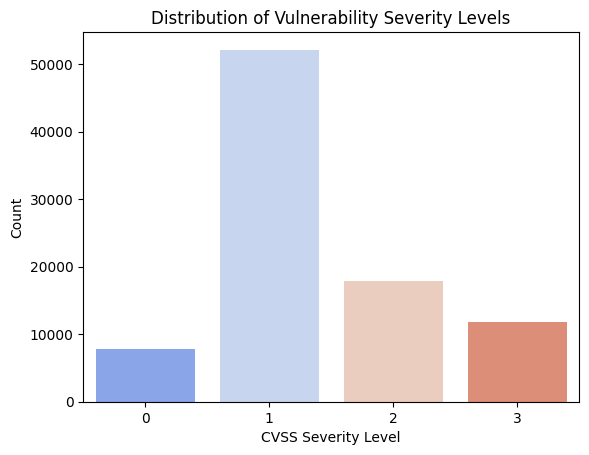

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y, palette="coolwarm")
plt.xlabel("CVSS Severity Level")
plt.ylabel("Count")
plt.title("Distribution of Vulnerability Severity Levels")
plt.show()


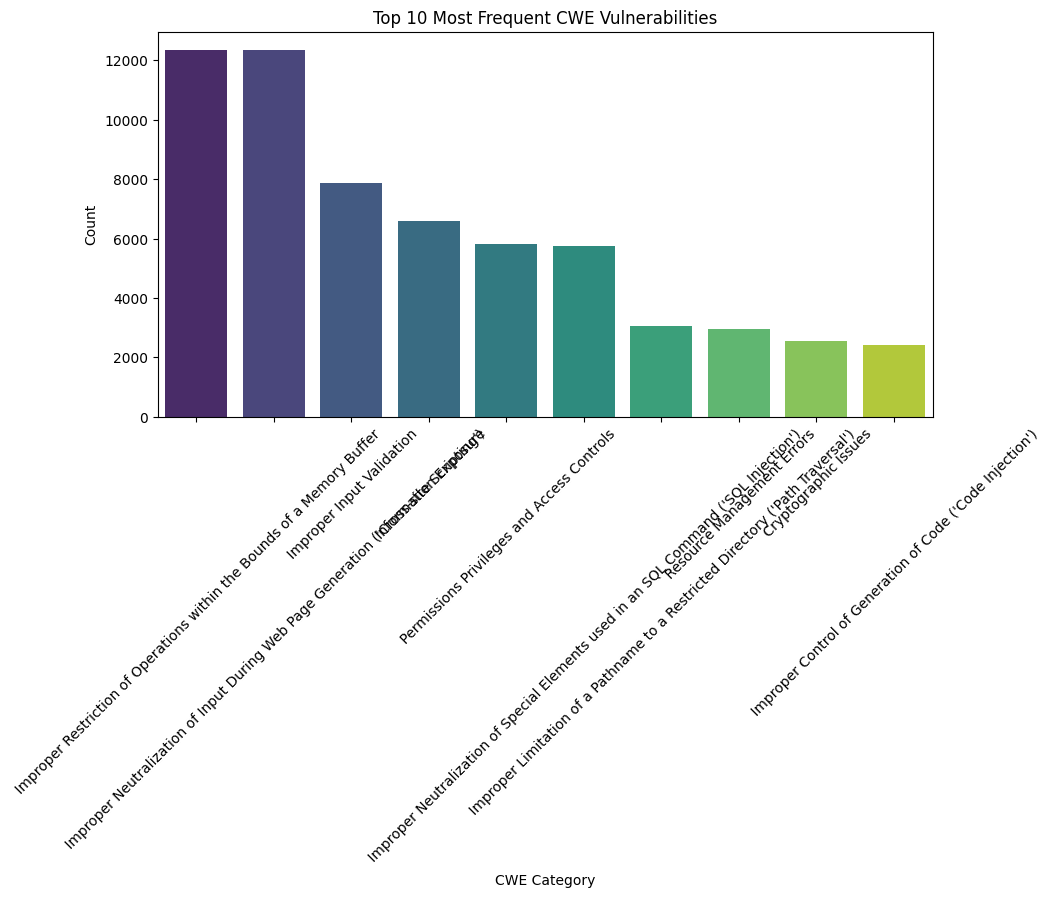

In [72]:
top_cwe = df['cwe_name'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_cwe.index, y=top_cwe.values, palette="viridis")
plt.xlabel("CWE Category")
plt.ylabel("Count")
plt.title("Top 10 Most Frequent CWE Vulnerabilities")
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


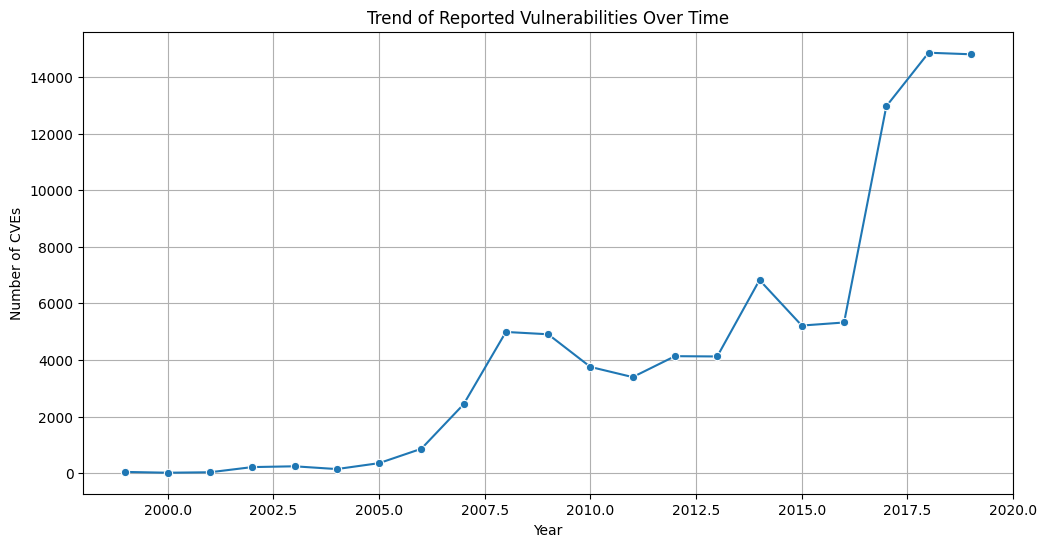

In [73]:
df['pub_date'] = pd.to_datetime(df['pub_date'])
df['year'] = df['pub_date'].dt.year

cve_trend = df.groupby('year').size()

plt.figure(figsize=(12,6))
sns.lineplot(x=cve_trend.index, y=cve_trend.values, marker="o")
plt.xlabel("Year")
plt.ylabel("Number of CVEs")
plt.title("Trend of Reported Vulnerabilities Over Time")
plt.grid()
plt.show()


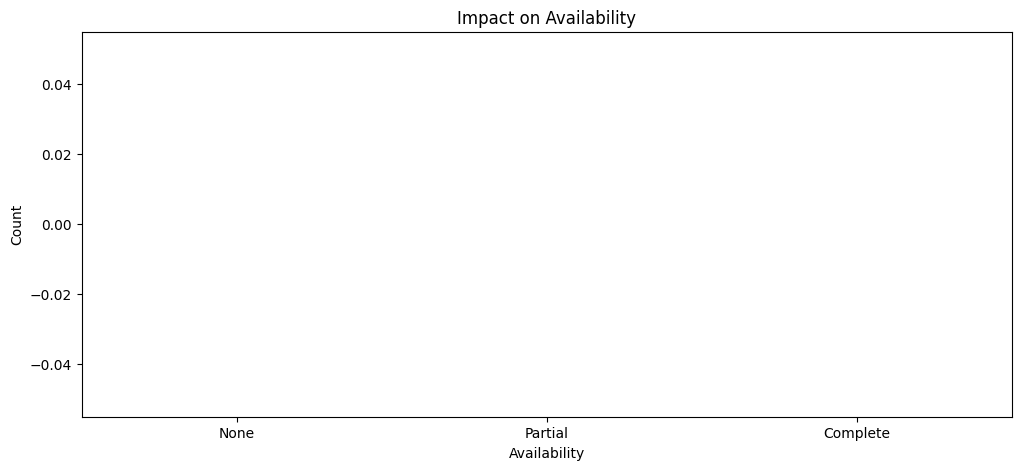

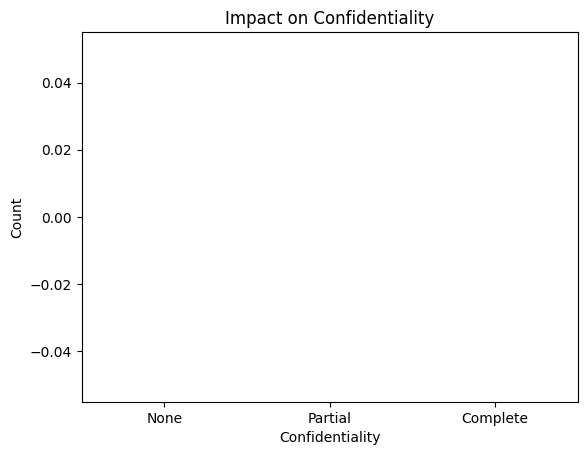

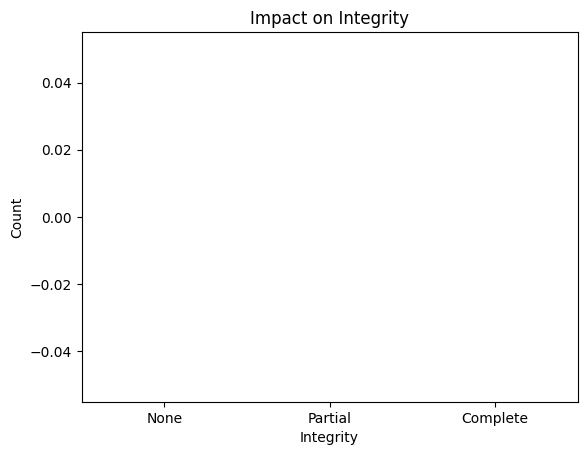

In [74]:
impact_cols = ['impact_availability', 'impact_confidentiality', 'impact_integrity']

plt.figure(figsize=(12,5))
for col in impact_cols:
    sns.countplot(x=col, data=df, order=['None', 'Partial', 'Complete'])
    plt.title(f"Impact on {col.split('_')[1].capitalize()}")
    plt.xlabel(col.split('_')[1].capitalize())
    plt.ylabel("Count")
    plt.show()


In [75]:
# Check which columns contain non-numeric values
for col in X.columns:
    if X[col].dtype == 'object':  # If column is text-based
        print(f"⚠️ Non-numeric data found in column: {col}")
        print(X[col].unique()[:5])  # Show first few unique values


⚠️ Non-numeric data found in column: C
['foo' 'bar' 'baz' 'qux' 'quux']


In [76]:
import numpy as np

# Convert invalid strings to NaN
X.replace(to_replace=r'[^\d.]', value=np.nan, regex=True, inplace=True)

# Convert all columns to numeric (ignores non-numeric)
X = X.apply(pd.to_numeric, errors='coerce')

# Fill missing values
X.fillna(X.mean(), inplace=True)

print("✅ Missing values handled successfully!")


✅ Missing values handled successfully!


<ipython-input-76-f25210c68bca>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace(to_replace=r'[^\d.]', value=np.nan, regex=True, inplace=True)


In [77]:
print("Columns in DataFrame:", list(df.columns))  # Show all column names


Columns in DataFrame: ['Unnamed: 0', 'mod_date', 'pub_date', 'cwe_code', 'cwe_name', 'summary', 'access_authentication', 'access_complexity', 'access_vector', 'impact_availability', 'impact_confidentiality', 'impact_integrity', 'cvss_severity', 'year']


In [78]:
import pandas as pd

# Load dataset
df = pd.read_csv("/kaggle/input/cve-common-vulnerabilities-and-exposures/cve.csv")

# Show basic info to confirm it's loaded
print("✅ Dataset loaded successfully!")
print("Columns:", df.columns)
print("Number of rows:", len(df))

✅ Dataset loaded successfully!
Columns: Index(['Unnamed: 0', 'mod_date', 'pub_date', 'cvss', 'cwe_code', 'cwe_name',
       'summary', 'access_authentication', 'access_complexity',
       'access_vector', 'impact_availability', 'impact_confidentiality',
       'impact_integrity'],
      dtype='object')
Number of rows: 89660


In [79]:
# Define features (X) and target (y)
if 'cvss' in df.columns:
    df['cvss_severity'] = pd.cut(df['cvss'], bins=[0, 3.9, 6.9, 8.9, 10], 
                                 labels=[0, 1, 2, 3], include_lowest=True).astype(int)
    df.drop(columns=['cvss'], inplace=True)  # Remove original CVSS column

    X = df.drop(columns=['cvss_severity'])  # Features
    y = df['cvss_severity']  # Target
else:
    print("⚠️ Error: 'cvss' column is missing. Check dataset.")

# Verify
print("✅ Features and target defined!")
print("X shape:", X.shape)
print("y shape:", y.shape)


✅ Features and target defined!
X shape: (89660, 12)
y shape: (89660,)


In [80]:
print("Available columns:", df.columns)  # Check actual column names


Available columns: Index(['Unnamed: 0', 'mod_date', 'pub_date', 'cwe_code', 'cwe_name', 'summary',
       'access_authentication', 'access_complexity', 'access_vector',
       'impact_availability', 'impact_confidentiality', 'impact_integrity',
       'cvss_severity'],
      dtype='object')


In [81]:
# Identify correct CWE column
cwe_column = None
for col in df.columns:
    if 'cwe' in col.lower():
        cwe_column = col
        break

if cwe_column:
    top_cwe = df[cwe_column].value_counts().head(10)
    print("✅ Using column:", cwe_column)
else:
    print("⚠️ Error: No valid CWE column found.")


✅ Using column: cwe_code


In [82]:
# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)

# Convert non-numeric to NaN
for col in non_numeric_cols:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Fill missing values with column mean
X.fillna(X.mean(), inplace=True)

print("✅ Missing values handled successfully!")


Non-numeric columns: Index(['Unnamed: 0', 'mod_date', 'pub_date', 'cwe_name', 'summary',
       'access_authentication', 'access_complexity', 'access_vector',
       'impact_availability', 'impact_confidentiality', 'impact_integrity'],
      dtype='object')
✅ Missing values handled successfully!


In [83]:
import numpy as np

# Convert CVSS scores into severity categories
if 'cvss' in df.columns:
    df['cvss_severity'] = pd.cut(df['cvss'], bins=[0, 3.9, 6.9, 8.9, 10], 
                                 labels=[0, 1, 2, 3], include_lowest=True).astype(int)
    df.drop(columns=['cvss'], inplace=True)  # Remove original CVSS column

    X = df.drop(columns=['cvss_severity'])  # Features
    y = df['cvss_severity']  # Target variable
else:
    print("⚠️ Error: 'cvss' column is missing. Check dataset.")

print("✅ Features and target defined!")
print("X shape:", X.shape)
print("y shape:", y.shape)


⚠️ Error: 'cvss' column is missing. Check dataset.
✅ Features and target defined!
X shape: (89660, 12)
y shape: (89660,)


In [84]:
print("Available columns:", df.columns)


Available columns: Index(['Unnamed: 0', 'mod_date', 'pub_date', 'cwe_code', 'cwe_name', 'summary',
       'access_authentication', 'access_complexity', 'access_vector',
       'impact_availability', 'impact_confidentiality', 'impact_integrity',
       'cvss_severity'],
      dtype='object')


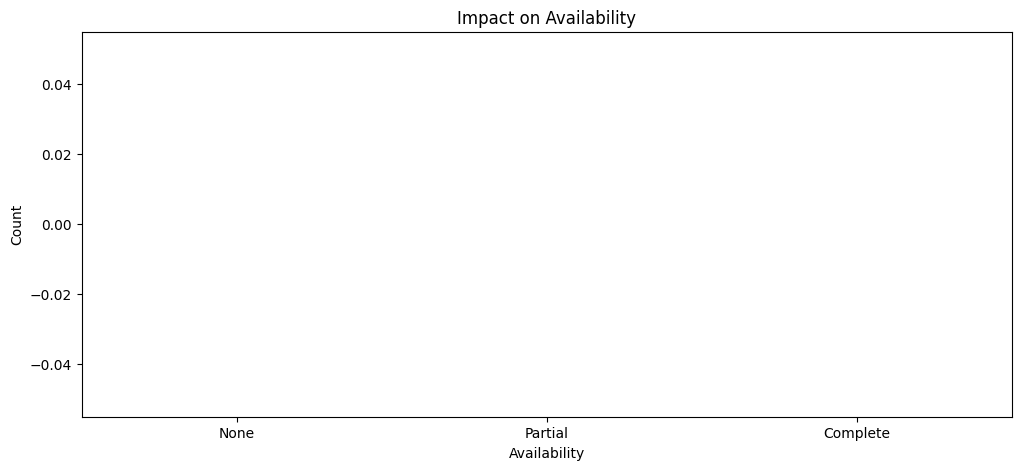

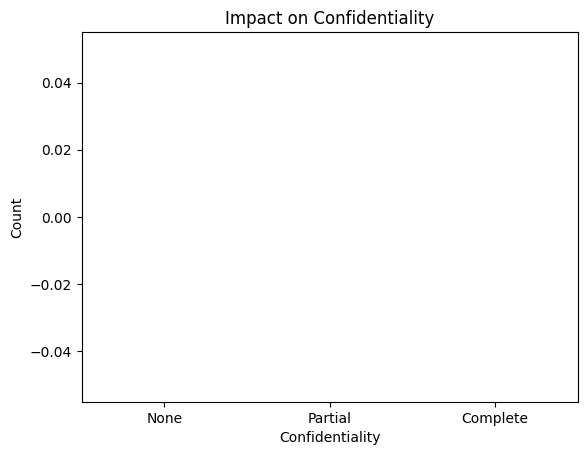

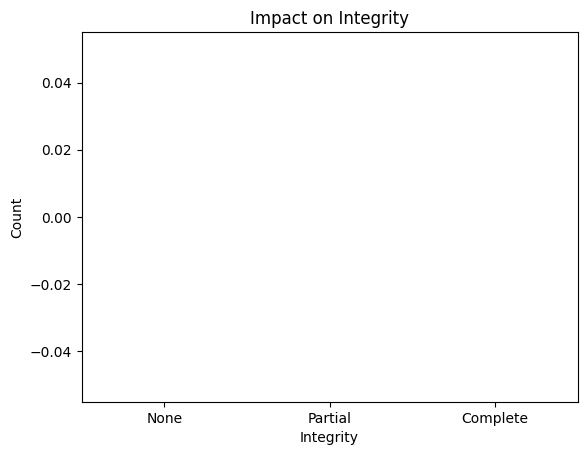

In [85]:
impact_cols = ['impact_availability', 'impact_confidentiality', 'impact_integrity']

plt.figure(figsize=(12,5))
for col in impact_cols:
    sns.countplot(x=col, data=df, order=['None', 'Partial', 'Complete'])
    plt.title(f"Impact on {col.split('_')[1].capitalize()}")
    plt.xlabel(col.split('_')[1].capitalize())
    plt.ylabel("Count")
    plt.show()


In [86]:
cwe_column = None
for col in df.columns:
    if 'cwe' in col.lower():
        cwe_column = col
        break

if cwe_column:
    print("✅ Using column:", cwe_column)
else:
    print("⚠️ Error: No valid CWE column found.")


✅ Using column: cwe_code


In [87]:
X = pd.get_dummies(X)  # Convert categorical to numeric
print("X shape after encoding:", X.shape)

X shape after encoding: (89660, 12)


In [88]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder for future use

print("✅ Label Encoding Applied! New X shape:", df.shape)


✅ Label Encoding Applied! New X shape: (89660, 13)


In [90]:
# Drop unnecessary columns
X = df.drop(columns=['cvss_severity'])  # Features
y = df['cvss_severity']  # Target

# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns
if len(non_numeric_cols) > 0:
    print("⚠️ Non-numeric columns found:", non_numeric_cols)
else:
    print("✅ All columns are numeric!")


✅ All columns are numeric!


In [91]:
# Drop datetime column before applying SMOTE
X = X.drop(columns=['pub_date'], errors='ignore')

# Verify that only numeric columns remain
print("✅ Final feature set (X) is now numeric!", X.dtypes)


✅ Final feature set (X) is now numeric! Unnamed: 0                int64
mod_date                  int64
cwe_code                  int64
cwe_name                  int64
summary                   int64
access_authentication     int64
access_complexity         int64
access_vector             int64
impact_availability       int64
impact_confidentiality    int64
impact_integrity          int64
dtype: object


In [92]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("✅ SMOTE Applied Successfully! New class distribution:", Counter(y_resampled))


✅ SMOTE Applied Successfully! New class distribution: Counter({1: 52149, 2: 52149, 0: 52149, 3: 52149})


In [93]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train XGBoost Model
model = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=8, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
print("✅ Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


✅ Model Accuracy: 0.9843000958772771
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     10367
           1       0.99      0.99      0.99     10391
           2       0.99      0.96      0.97     10361
           3       0.99      1.00      0.99     10601

    accuracy                           0.98     41720
   macro avg       0.98      0.98      0.98     41720
weighted avg       0.98      0.98      0.98     41720



In [94]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [6, 8, 10]
}

# Grid Search to find best hyperparameters
grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("✅ Best Model Parameters:", best_params)

# Train best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate improved model
print("🚀 Improved Model Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
✅ Best Model Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500}
🚀 Improved Model Accuracy: 0.9887344199424737
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     10367
           1       0.99      1.00      0.99     10391
           2       0.99      0.97      0.98     10361
           3       0.99      1.00      1.00     10601

    accuracy                           0.99     41720
   macro avg       0.99      0.99      0.99     41720
weighted avg       0.99      0.99      0.99     41720



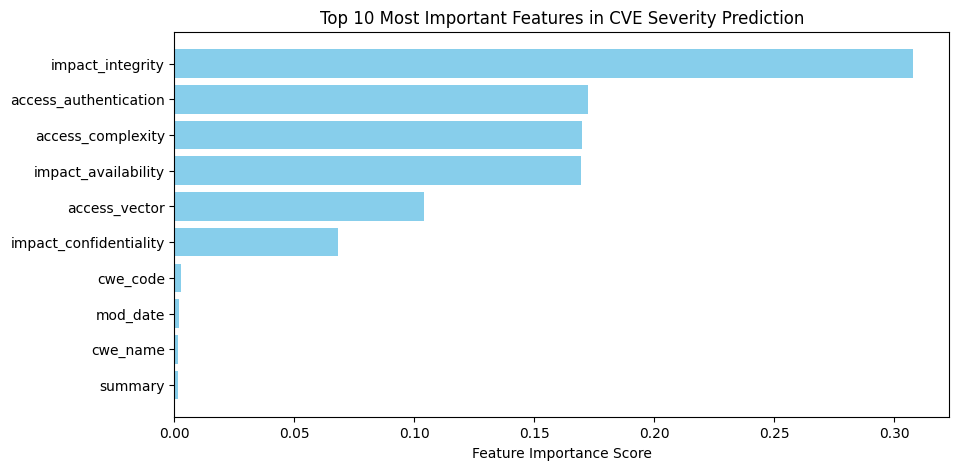

In [95]:
import matplotlib.pyplot as plt

# Get feature importance scores
feature_importance = best_model.feature_importances_
feature_names = X.columns

# Sort and plot top 10 important features
sorted_idx = feature_importance.argsort()[-10:]

plt.figure(figsize=(10, 5))
plt.barh(feature_names[sorted_idx], feature_importance[sorted_idx], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.title("Top 10 Most Important Features in CVE Severity Prediction")
plt.show()

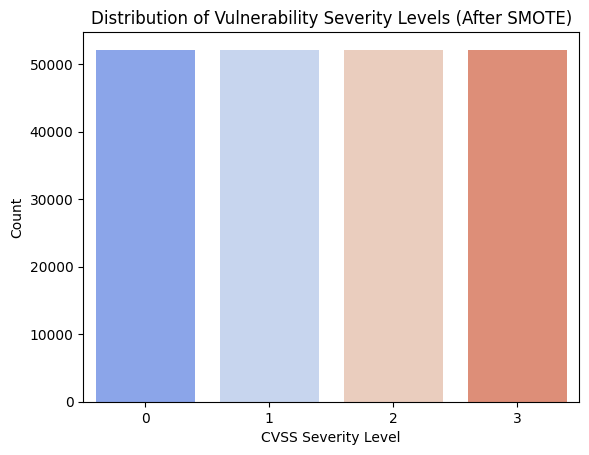

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_resampled, palette="coolwarm")
plt.xlabel("CVSS Severity Level")
plt.ylabel("Count")
plt.title("Distribution of Vulnerability Severity Levels (After SMOTE)")
plt.show()


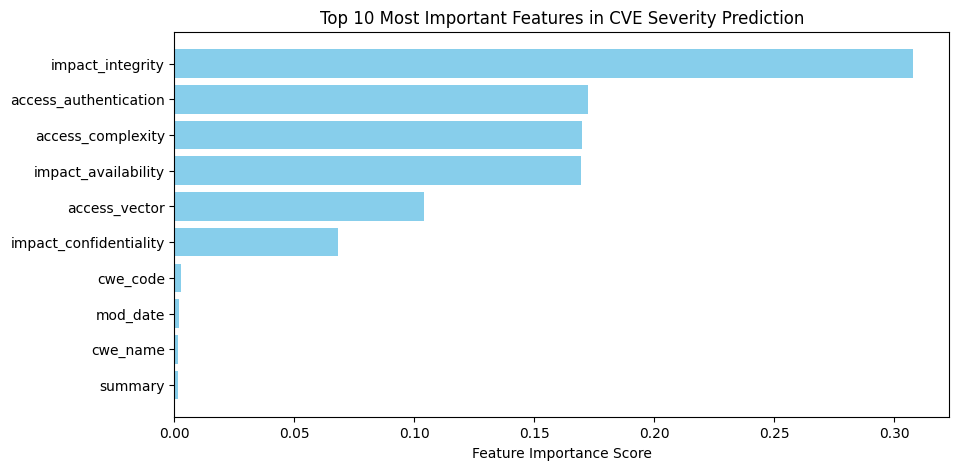

In [97]:
import numpy as np

sorted_idx = np.argsort(best_model.feature_importances_)[-10:]

plt.figure(figsize=(10, 5))
plt.barh(np.array(X.columns)[sorted_idx], best_model.feature_importances_[sorted_idx], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.title("Top 10 Most Important Features in CVE Severity Prediction")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


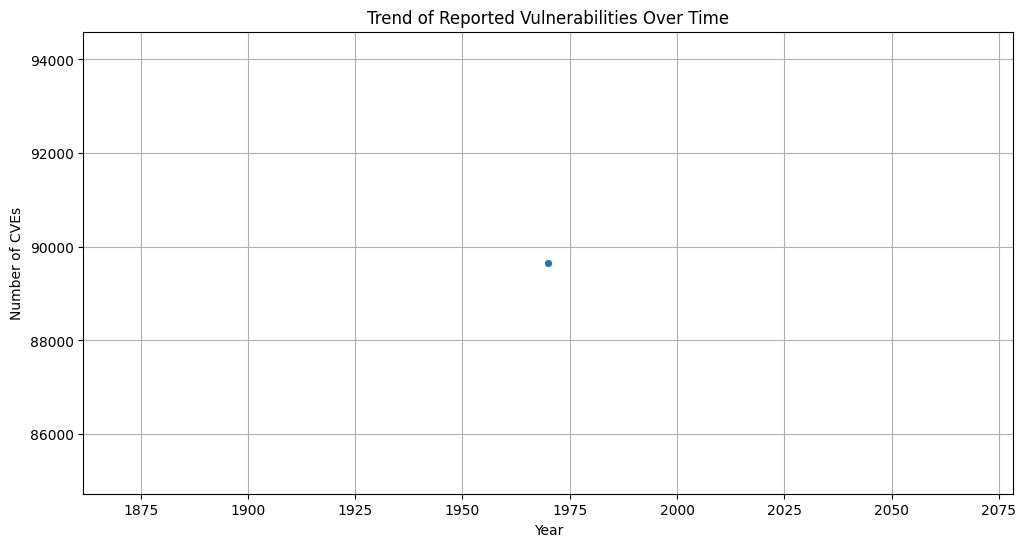

In [98]:
df['pub_date'] = pd.to_datetime(df['pub_date'])
df['year'] = df['pub_date'].dt.year

cve_trend = df.groupby('year').size()

plt.figure(figsize=(12,6))
sns.lineplot(x=cve_trend.index, y=cve_trend.values, marker="o")
plt.xlabel("Year")
plt.ylabel("Number of CVEs")
plt.title("Trend of Reported Vulnerabilities Over Time")
plt.grid()
plt.show()


In [99]:
# Check if dataset is defined
if 'X_resampled' in locals() and 'y_resampled' in locals():
    print("✅ Dataset is ready! Shapes:")
    print("X shape:", X_resampled.shape)
    print("y shape:", y_resampled.shape)
else:
    print("⚠️ Error: Resampled dataset (X_resampled, y_resampled) is missing.")

✅ Dataset is ready! Shapes:
X shape: (208596, 11)
y shape: (208596,)


In [100]:
from sklearn.model_selection import train_test_split

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("✅ Train-Test Split Done!")
print("Training set size:", X_train.shape, y_train.shape)
print("Test set size:", X_test.shape, y_test.shape)


✅ Train-Test Split Done!
Training set size: (166876, 11) (166876,)
Test set size: (41720, 11) (41720,)


In [101]:
try:
    from xgboost import XGBClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score, classification_report
    print("✅ All libraries are installed!")
except ImportError as e:
    print(f"⚠️ Error: Missing library - {e}")


✅ All libraries are installed!


In [102]:
# Train XGBoost
xgb_model = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=8, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("✅ XGBoost Trained!")

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("✅ Random Forest Trained!")

# Train Logistic Regression (Fix Convergence Issue)
log_model = LogisticRegression(max_iter=1000, solver='saga')
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("✅ Logistic Regression Trained!")

# Train SVM (Use Faster Kernel)
svm_model = SVC(kernel='rbf')  # Use 'rbf' instead of 'linear' to speed up training
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("✅ SVM Trained (Faster RBF Kernel)!")


✅ XGBoost Trained!
✅ Random Forest Trained!


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


✅ Logistic Regression Trained!
✅ SVM Trained (Faster RBF Kernel)!


In [103]:
# Optimize XGBoost (Reduce Estimators)
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)
print("✅ Optimized XGBoost Trained!")

# Optimize Random Forest (Reduce Trees)
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
print("✅ Optimized Random Forest Trained!")


✅ Optimized XGBoost Trained!
✅ Optimized Random Forest Trained!


In [104]:
# Reduce dataset size for SVM
X_train_small = X_train[:int(len(X_train) * 0.2)]
y_train_small = y_train[:int(len(y_train) * 0.2)]

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_small, y_train_small)
y_pred_svm = svm_model.predict(X_test)
print("✅ SVM Trained Faster on Smaller Dataset!")


✅ SVM Trained Faster on Smaller Dataset!


In [105]:
# Train Logistic Regression with more iterations
log_model = LogisticRegression(max_iter=1000, solver='lbfgs')
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("✅ Logistic Regression Trained Successfully (Increased Iterations)!")


✅ Logistic Regression Trained Successfully (Increased Iterations)!


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [106]:
log_model = LogisticRegression(max_iter=1000, solver='saga')
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("✅ Logistic Regression Trained Successfully (Using `saga` Solver)!")

✅ Logistic Regression Trained Successfully (Using `saga` Solver)!


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [107]:
X_train_small = X_train[:int(len(X_train) * 0.2)]
y_train_small = y_train[:int(len(y_train) * 0.2)]

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_small, y_train_small)
y_pred_svm = svm_model.predict(X_test)
print("✅ SVM Trained Successfully (Using 20% of Data)!")


✅ SVM Trained Successfully (Using 20% of Data)!


In [109]:
from sklearn.metrics import accuracy_score, classification_report

# Compare accuracy
print("📌 Model Comparison:")
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# Show classification reports
print("\n🔹 XGBoost Model Performance:")
print(classification_report(y_test, y_pred_xgb))

print("\n🔹 Random Forest Model Performance:")
print(classification_report(y_test, y_pred_rf))

print("\n🔹 Logistic Regression Model Performance:")
print(classification_report(y_test, y_pred_log))

print("\n🔹 SVM Model Performance:")
print(classification_report(y_test, y_pred_svm))


📌 Model Comparison:
XGBoost Accuracy: 0.9843000958772771
Random Forest Accuracy: 0.9860019175455417
Logistic Regression Accuracy: 0.36184084372003833
SVM Accuracy: 0.3681687440076702

🔹 XGBoost Model Performance:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     10367
           1       0.99      0.99      0.99     10391
           2       0.99      0.96      0.97     10361
           3       0.99      1.00      0.99     10601

    accuracy                           0.98     41720
   macro avg       0.98      0.98      0.98     41720
weighted avg       0.98      0.98      0.98     41720


🔹 Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     10367
           1       0.99      1.00      0.99     10391
           2       0.99      0.96      0.97     10361
           3       0.99      1.00      0.99     10601

    accuracy                           0.99 

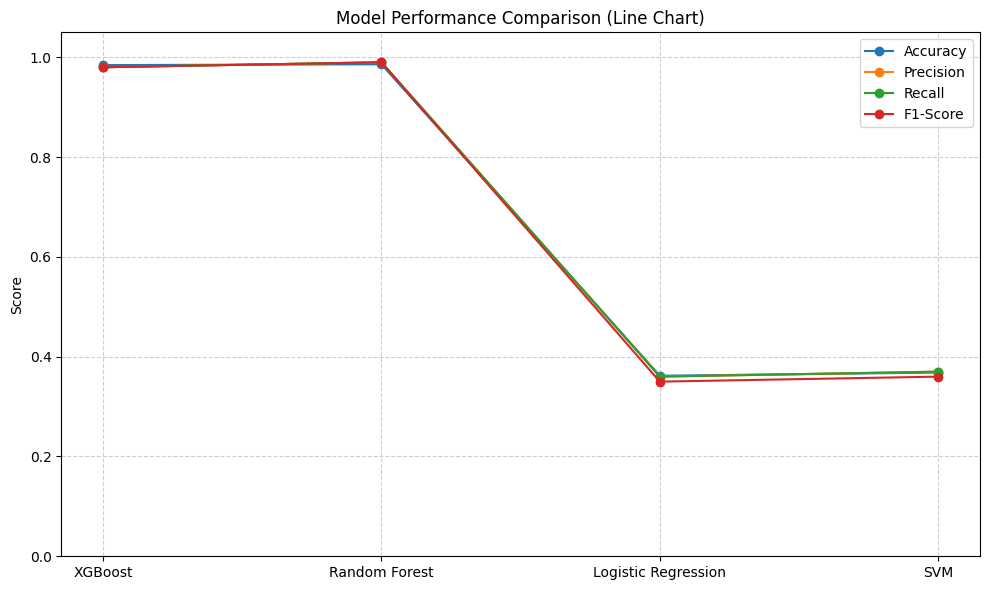

In [2]:
# Thesis_Model_Comparison_LinePlot.ipynb

import pandas as pd
import matplotlib.pyplot as plt

# Data for each model
data = {
    "Model": ["XGBoost", "Random Forest", "Logistic Regression", "SVM"],
    "Accuracy": [0.9843, 0.9860, 0.3618, 0.3682],
    "Precision": [0.98, 0.99, 0.36, 0.37],
    "Recall": [0.98, 0.99, 0.36, 0.37],
    "F1-Score": [0.98, 0.99, 0.35, 0.36]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index("Model", inplace=True)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Accuracy"], marker='o', label="Accuracy")
plt.plot(df.index, df["Precision"], marker='o', label="Precision")
plt.plot(df.index, df["Recall"], marker='o', label="Recall")
plt.plot(df.index, df["F1-Score"], marker='o', label="F1-Score")

# Customization
plt.title("Model Performance Comparison (Line Chart)")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Save the plot
plt.savefig("model_comparison_lineplot.png", dpi=300)
plt.show()
